# What Made Kickstarter's Success Rate so Low?

## Goal

The goal of this project is to identify variables that correlate to Kickstarter's success rate. Kickstarter's mission is to help people upstart their projects through crowdfunding. Although it has a vast potential as an online crowdfunding platform, there have been numerous times where it has failed to fulfilled its mission. This data analysis project aims to provide insight that can help Kickstarter and other crowdfunding platforms to achieve their campaign's success rate target.

## Setup

### Importing necesarry libraries

In [1]:
## Load Packages

# Pandas (Table)
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np

# Plot visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File Path Load
from pathlib import Path

# Date 
from datetime import datetime as dt

## Data Preparation

### Reading the data

In [2]:
## Path load
path = Path("C:/Users/Aldo Gadra/Documents/Data overview/Portofolio/2024/Business_Kickstarter")

df = pd.read_csv(path / "kickstarter_project.csv")

### Data types Checking

In [3]:
df.dtypes

ID              int64
Name           object
Category       object
Subcategory    object
Country        object
Launched       object
Deadline       object
Goal            int64
Pledged         int64
Backers         int64
State          object
dtype: object

In [4]:
df.State.unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [5]:
df.Category.unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Theater', 'Music', 'Photography', 'Games', 'Design',
       'Food', 'Crafts', 'Comics', 'Dance'], dtype=object)

## Data Cleaning

### Data Transformation

In [6]:
# To Datetime
df['Launched']= pd.to_datetime(df['Launched'])
df['Deadline']= pd.to_datetime(df['Deadline'])

## Extract Year Month
df["year_month"] = df["Launched"].dt.to_period("M")

### Feature Check & Load

In [7]:
## The datetime variables are inputted as object
date_vars = ["Launched","Deadline"]

In [8]:
cat_vars = [
    var for var in df.columns if df[var].dtype == 'O' and var not in date_vars]

print(f"Categorical Feature: \n{cat_vars}", end='')

Categorical Feature: 
['Name', 'Category', 'Subcategory', 'Country', 'State']

In [9]:
## Drop name cause it's a string entry
cat_vars.remove("Name")

In [10]:
num_vars = [
    var for var in df.columns if df[var].dtype == "int" or "float" and var not in cat_vars and var not in date_vars]

print(f"Numerical Feature: \n{num_vars}", end='')

Numerical Feature: 
['ID', 'Name', 'Goal', 'Pledged', 'Backers', 'year_month']

In [11]:
## Drop ID cause that's and identifier
num_vars.remove("ID")
num_vars.remove("Name")

In [12]:
## Discrete Vars
disc_vars = [
    var for var in num_vars if df[var].nunique() < 20 ]

print(f"Discrete feature: \n{disc_vars}", end='')

Discrete feature: 
[]

In [13]:
## Continous Feature 
cont_vars = [
    var for var in num_vars if var not in disc_vars and cat_vars]

print(f"Continous feature: \n{cont_vars}", end='')

Continous feature: 
['Goal', 'Pledged', 'Backers', 'year_month']

In [14]:
## Generate intrest variable 
df["Money_per_backers"] = df["Pledged"]/df["Backers"]
df["Goal_met_perc"] = (df["Pledged"]/df["Goal"])*100 

### Duplicate & Missing Data Checking

In [15]:
## Duplicate check
Duplicated = df[df.duplicated(keep=False)]
Duplicated

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,year_month,Money_per_backers,Goal_met_perc


In [16]:
## Check missing 
df.isna().sum()

ID                       0
Name                     0
Category                 0
Subcategory              0
Country                  0
Launched                 0
Deadline                 0
Goal                     0
Pledged                  0
Backers                  0
State                    0
year_month               0
Money_per_backers    51801
Goal_met_perc            2
dtype: int64

In [17]:
df.isnull().sum()

ID                       0
Name                     0
Category                 0
Subcategory              0
Country                  0
Launched                 0
Deadline                 0
Goal                     0
Pledged                  0
Backers                  0
State                    0
year_month               0
Money_per_backers    51801
Goal_met_perc            2
dtype: int64

In [18]:
df.sample(3)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,year_month,Money_per_backers,Goal_met_perc
230671,1331144404,TEEN SAFE,Technology,Apps,United States,2015-06-17 09:55:08,2015-08-16,34000,0,0,Failed,2015-06,NaN,0.000000
298994,11817283,Heart Center: The Yoga Musical!,Theater,Musical,United States,2016-07-16 03:37:53,2016-07-31,350,360,17,Successful,2016-07,21.176471,102.857143
211350,498399041,Word Exchange Album Coming Soon,Music,Faith,United States,2015-03-25 23:30:58,2015-04-25,10000,1,1,Failed,2015-03,1.000000,0.010000


In [19]:
min_date = df['Launched'].min()
max_date = df['Launched'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2009-04-21 21:02:48
Maximum date: 2018-01-02 15:02:31


In [20]:
## Continous Data Checking 
df[cont_vars].describe()    

,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,374853.000000
mean,4.586378e+04,9.121073e+03,106.690359
std,1.158778e+06,9.132054e+04,911.718520
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.250000e+02,12.000000
75%,1.600000e+04,4.051000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


Notes: There are some projects that don't aim to gather money (Goal = 0). These kinds of projects are irrelevant to this analysis's goal and shall be omitted further on. 

In [21]:
# Filter project who aimed on gathering money.
df = df[df["Goal"] > 0]

## Data Exploration

### What's the base classifier?

To simplify the EDA, it should be wise to based it on a category column that have the lowest unique value count and relevant to the data analysis goal. 

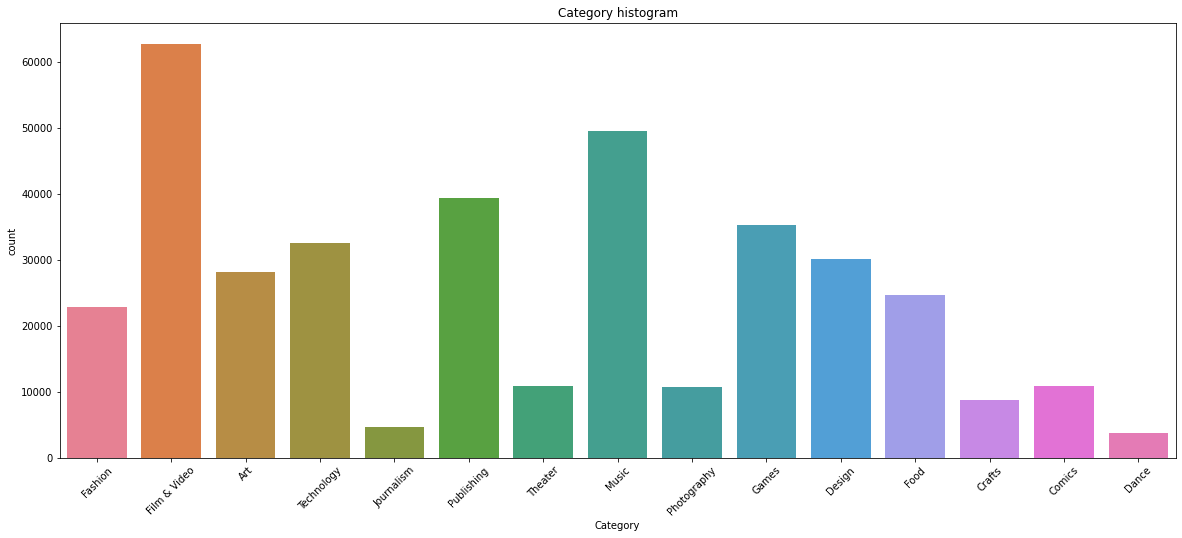

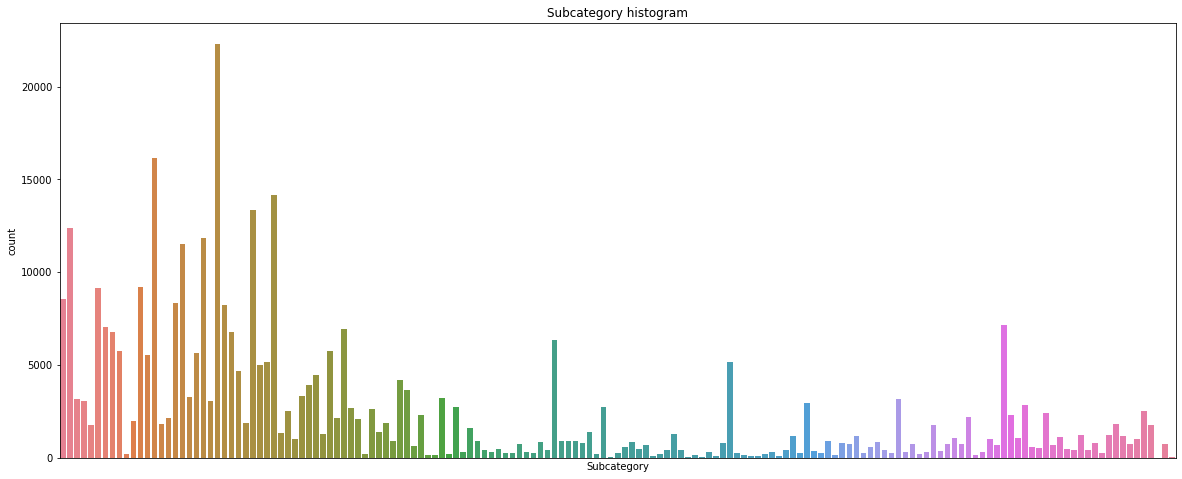

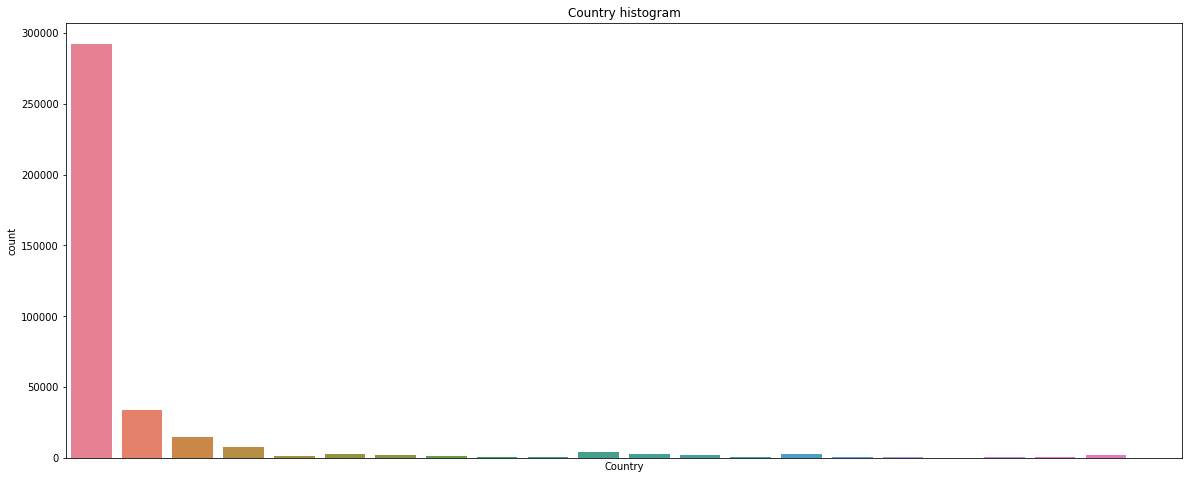

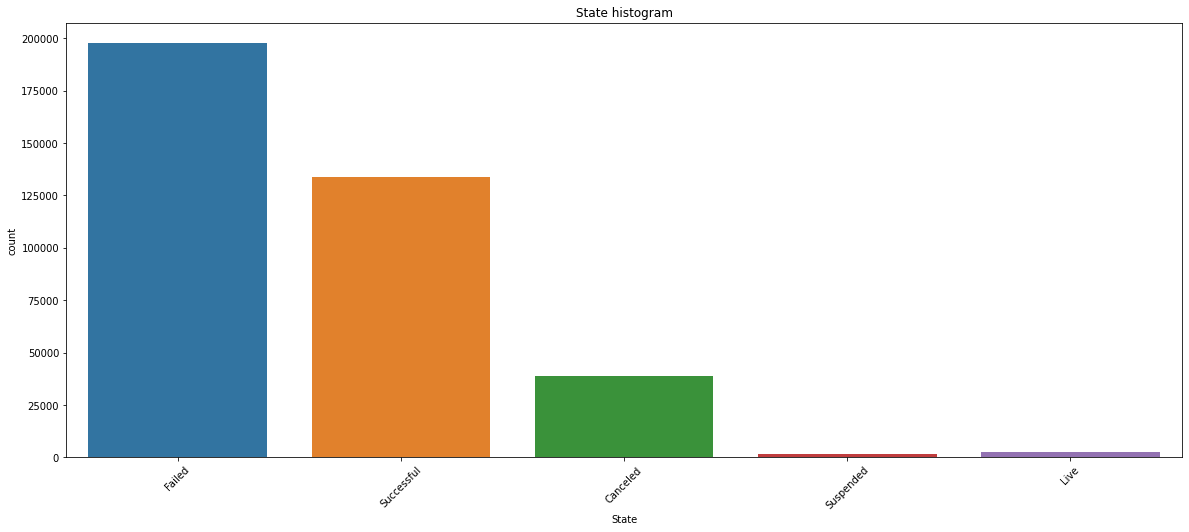

In [22]:
## Check the distribution of every category feature variable
for var in cat_vars:
    plt.figure(figsize=(20,8))
    sns.countplot(data=df, x=var, hue=var)
    plt.title(f"{var} histogram")
    if df[var].nunique() > 20:
        plt.xticks([])
    else:
        plt.xticks(rotation=45)
    plt.show

Notes: 
- The project's state column has the lowest unique value count and has valuable information related to the project crowdfunding state. Therefore, further analysis will be based on the state column as the main category column.

#### Chart 1. State Pie Chart

In [23]:
## Group by State 
df_1 = df.copy()


df_1["count"] = 1

df_c = df_1.groupby("State").agg(Count=("count","sum"))

df_c

,Count
State,
Canceled,38750
Failed,197610
Live,2798
Successful,133849
Suspended,1842


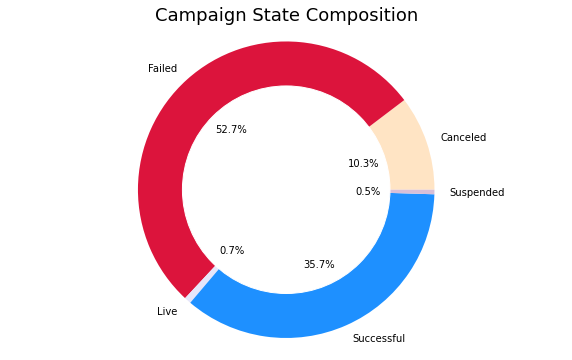

In [24]:
## Pie Chart
fig, ax = plt.subplots(figsize=(10,6), facecolor="white")

# Make an inner circle 
my_circle = plt.Circle((0,0), 0.7, color="white")

# Choose color selection
color = ["bisque","crimson","lavender","dodgerblue","thistle"]

ax.pie(df_c["Count"], labels=df_c.index,autopct='%1.1f%%', pctdistance=0.55, colors=color)

#plt.show()
plt.gca().add_artist(my_circle)
plt.axis('equal')

# Add title
plt.title("Campaign State Composition", fontsize=18)

plt.savefig('kickstarter_1_pie.png')

Notes: 
- There is still some projects that are still "Live" or actively collecting money during the data collection period.

In [25]:
## Investigate live data project 

# Filter the live project
temp = df.copy()

# If the value is Live then assign count to 1 
temp.loc[temp["State"] == "Live", "count"] = 1

# Group by date
temp["year_month"] = temp["Launched"].dt.to_period("M").dt.to_timestamp()

temp = temp.groupby("year_month").agg(Count=("count","sum")).reset_index(drop=False)

temp

,year_month,Count
0,2009-04-01,0.0
1,2009-05-01,0.0
2,2009-06-01,0.0
3,2009-07-01,0.0
4,2009-08-01,0.0
...,...,...
101,2017-09-01,0.0
102,2017-10-01,1.0
103,2017-11-01,534.0
104,2017-12-01,2137.0


In [26]:
## Determine when the the first instance the "live" project still exist
temp1 = temp[temp["Count"] > 0]
temp1

,year_month,Count
87,2016-07-01,1.0
93,2017-01-01,1.0
95,2017-03-01,1.0
99,2017-07-01,1.0
102,2017-10-01,1.0
103,2017-11-01,534.0
104,2017-12-01,2137.0
105,2018-01-01,122.0


Notes: 
- There seems to be an increase of "Live" project on project launched after 2017-11-01. This indicates that numerous project are still actively collecting pledges money during the data collection process.

In [27]:
## Investigate the live project the launched before 2017-11-01
df_tmp = df.copy()

df_tmp["Launched"] = df_tmp["Launched"].dt.to_period("M").dt.to_timestamp() 

df_tmp = df_tmp.loc[(df_tmp["Launched"] <= "2017-10-30") & (df_tmp["State"] == "Live" )]

df_tmp

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,year_month,Money_per_backers,Goal_met_perc
300290,79946509,Omnicharge: Smart & Compact Portable Power Bank,Technology,Gadgets,United States,2016-07-01,2016-08-08,8000,7035,55,Live,2016-07,127.909091,87.937500
323344,619709625,Escapsim,Film & Video,Film & Video,United States,2017-01-01,2017-02-16,5000,30,3,Live,2017-01,10.000000,0.600000
333955,1100111323,DAWSON HOLLOW,Music,Indie Rock,United States,2017-03-01,2017-04-20,40000,20,1,Live,2017-03,20.000000,0.050000
352082,237278551,Flyboard Air®,Technology,Technology,Belgium,2017-07-01,2017-08-15,293500,610,2,Live,2017-07,305.000000,0.207836
364623,1225234610,The Hali Erickson Project,Music,Pop,United States,2017-10-01,2017-11-12,3000,320,9,Live,2017-10,35.555556,10.666667


Notes: 
- The "Live" entries above should be labeled "Failed" since they ran past their campaign deadline. The scope of this study will be limited to the period before "2017-10-30" in order to avoid the period when most of the projects are still live. Incorrect labels would not continue to become a problem since this analysis will only focus on "Successful" campaigns and assume other states as "Failed". 

In [28]:
df1 = df.loc[(df["Launched"] <= "2017-10-30")]

## What period has the highest success percentage? And why?

Kickstarter's success rate fluctuates from time to time. In order to accurately identify fluctuation trends and seasonality, I will use the seasonal decomposition technique (STL). The STL technique in this analysis assumes additive decomposition. 

### Seasonal Decomposition

In [53]:
## Import package
from statsmodels.tsa.seasonal import STL

In [54]:
### Success rate by category

## Group by month-year to analyze success rate
df_1 = df1.copy()

df_1["year_month"] = df_1["Launched"].dt.to_period("M")

df_1["count"] = 1

df_pivot = pd.pivot_table(df_1, values='count', index='year_month', columns='State',
                          aggfunc='count').reset_index(drop=False)

## get rid of the first column
df_pivot = df_pivot.rename_axis(None, axis=1)

## Sum the whole count
states = df1["State"].unique().tolist()

df_pivot["Count"] = df_pivot[states].sum(axis=1)

df_pivot["Success_Percentage"] =round(df_pivot["Successful"]/df_pivot["Count"], 2)

#Change type
df_pivot['year_month'] = df_pivot['year_month'].dt.to_timestamp()

## Impute naan with 0
df_pivot.fillna(0, inplace=True)

In [55]:
# Set Frequency as Index
df_p = df_pivot.copy()

df_p.set_index("year_month", inplace=True)

In [56]:
# Calculate STL
stl = STL(df_p["Success_Percentage"], seasonal=13, robust=True)
result = stl.fit()

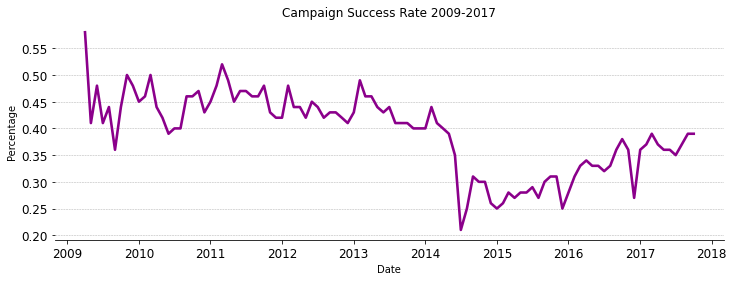

In [57]:
fig, ax = plt.subplots(figsize=(12,4), facecolor="white")

ax.plot(df_pivot["year_month"], df_pivot["Success_Percentage"], color="darkmagenta", linewidth=2.6)

# Label
ax.set_ylabel('Percentage')
ax.set_xlabel('Date')
plt.title("Campaign Success Rate 2009-2017")

## Aestethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

# Save
plt.savefig('kickstarter_2_trend.png')

Notes: 
- The success rate seems to decline after the year 2014. 

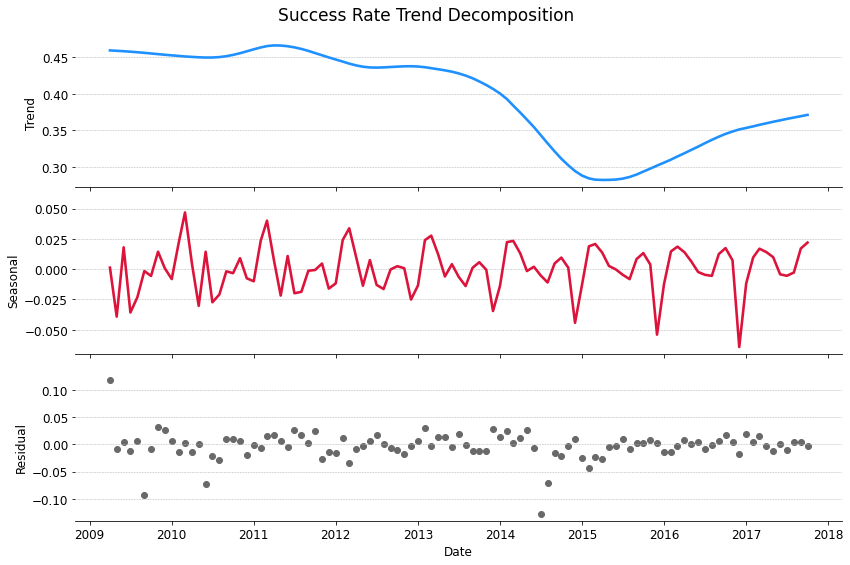

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,8), sharex=True, facecolor="white")
fig.suptitle("Success Rate Trend Decomposition", fontsize=17)

ax1.plot(df_p.index, result.trend, label='Trend', color='dodgerblue', linewidth=2.6)
ax1.set_ylabel('Trend')

ax2.plot(df_p.index, result.seasonal, label='Trend', color='crimson', linewidth=2.6)
ax2.set_ylabel('Seasonal')

ax3.scatter(df_p.index, result.resid, label='Trend', color='dimgray')
ax3.set_ylabel('Residual')

## Aesthethic
axes = [ax1, ax2, ax3]

for ax in axes:
    # Set line visibility
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.title.set_size(16)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(linewidth=0.5, axis="y", linestyle="--")

plt.xlabel('Date')
plt.tight_layout()
plt.savefig('kickstarter_2_trend_decomp.png')

Notes:
- After smoothing, there is still a noticeable declining trend after 2014, reaching the lowest point in 2015. This suggests a decline period after 2013.
- There are also seasonal dips at the end of the year. The mentioned seasonal trait is more noticeable after the year 2013. 
- Residual plots show dips in around 2014.

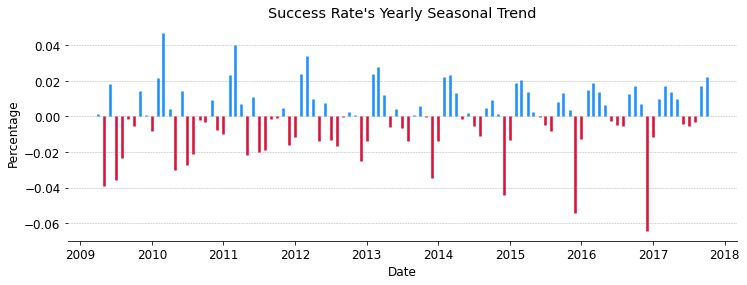

In [47]:
## Seasonal Trend 

fig, ax = plt.subplots(figsize=(12,8), facecolor="white")

## Create Conditional Color
color_1 = np.where(result.seasonal>=0, "dodgerblue", "crimson")

ax.vlines(x=df_p.index,ymin=0, ymax=result.seasonal, color=color_1, linewidth=2.6)
#ax.scatter(df_p.index, result.seasonal, color=color_1, s=1)

# Label
ax.set_ylabel('Percentage')
ax.set_xlabel('Date')
plt.title("Success Rate's Yearly Seasonal Trend")

## Aestethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

# Save
plt.savefig('kickstarter_3_seasonal_trend.png')

Notes:
- The expansion "end-of-the-year" seasonal decline trend is more noticeable in the year 2013 and onward. It generally happened in November and December. 

<h4>Changepoint Validity Check</h4>

Previous STL analysis showed a declining trend in 2014 and onwards. It is crucial to identify the precise start and end of the decline trend in order to identify the variables that caused it. I choose to use changepoint analysis using binary segmentation to identify the decline trend's changepoints. Since the overall dataset doesn't have a high point count, I choose to use least squared deviation instead of probability as a cost function for the binary segmentation method. 

In [95]:
## Binary Segmentation
import ruptures as rpt

In [25]:
## Pivot data by category
df_1 = df1.copy()

df_1["count"] = 1

df_pivot = pd.pivot_table(df_1, values='count', index='year_month', columns='State',
                          aggfunc='count', fill_value=0).reset_index(drop=False)

## get rid of the first column
df_pivot = df_pivot.rename_axis(None, axis=1)

## Sum the whole count
states = df1["State"].unique().tolist()

df_pivot["Count"] = df_pivot[states].sum(axis=1)

df_pivot["Success_Percentage"] =round(df_pivot["Successful"]/df_pivot["Count"], 2)*100

#Change type
df_pivot['year_month'] = df_pivot['year_month'].dt.to_timestamp()

df_pivot

,year_month,Canceled,Failed,Live,Successful,Suspended,Count,Success_Percentage
0,2009-04-01,1,7,0,11,0,19,58.0
1,2009-05-01,12,32,0,30,0,74,41.0
2,2009-06-01,5,34,0,36,0,75,48.0
3,2009-07-01,11,35,0,32,0,78,41.0
4,2009-08-01,14,50,0,51,0,115,44.0
...,...,...,...,...,...,...,...,...
98,2017-06-01,470,2365,0,1622,47,4504,36.0
99,2017-07-01,509,2185,1,1487,37,4219,35.0
100,2017-08-01,505,2218,0,1600,32,4355,37.0
101,2017-09-01,482,2004,0,1584,30,4100,39.0


In [98]:
## Binary segementation with predetermined segmentation; Using Least Squared Deviation as Cost Function
algo = rpt.Binseg(model="l2", min_size=3)
algo.fit(data1)
result = algo.predict(n_bkps=2)

(<Figure size 720x144 with 1 Axes>, [<Axes: >])

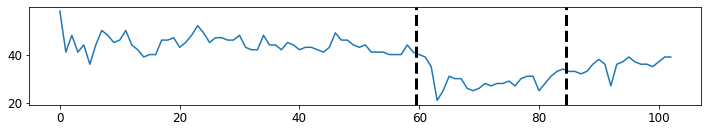

In [97]:
rpt.display(data1, [], result)

In [39]:
## Filter the last value indices
rows = result[:-1]

## Extract the indices dates
selected_dates = df_pivot.iloc[rows]['year_month'].tolist()
print("Selected Dates:", selected_dates)

Selected Dates: [Timestamp('2014-04-01 00:00:00'), Timestamp('2016-05-01 00:00:00')]


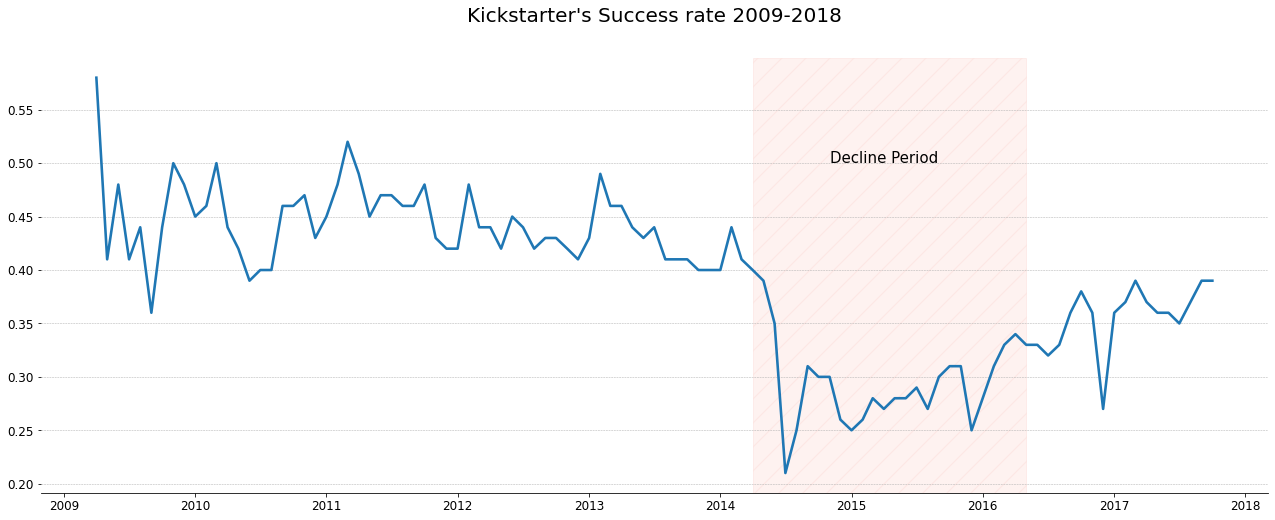

In [44]:
## Plot phase split
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_pivot["year_month"], df_pivot["Success_Percentage"], linewidth=2.6)

ax.set_title("Kickstarter's Success rate 2009-2018", pad=36)
ax.title.set_size(20)

## Highlight the decline period
ax.axvspan(pd.Timestamp("2014-04"), pd.Timestamp("2016-05"), color="salmon", alpha=0.1, hatch="/")

ax.text(pd.Timestamp("2014-11-01"), 0.5, "Decline Period", fontsize="15")

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

#ax.legend(fontsize="15")
plt.show()

#### Conclusion: 
- The Kickstarter success rate's decline started from April of 2014 to May of 2016. 

### Line chart check on project and goal growth

After identifying the success rate's decline period, I continue the analysis by exploring other variables that may correlate with the success rate. Since Kickstarter project's success is dependent on the number of backers and its goal target, further analysis will explore more on the two mentioned variables.  

In [29]:
## Group by date 
## Group by the continous variable

df_1 = df1.copy()

df_1["count"] = 1

#cont_vars.append["count"]

dfp_1 = df_1.groupby("year_month").agg(Backers=("Backers","sum"),
                                   Pledged=("Pledged","sum"),
                                     Project=("count", "sum"),
                                     Goal=("Goal", "sum"),
                                    Mean_Pledged=("Pledged", "mean"),
                                    Mean_Goal=("Goal","mean")).reset_index()
#Change type
dfp_1['year_month'] = dfp_1['year_month'].dt.to_timestamp()

## Set 2009 -04 - 01 index
columns = ["Backers","Pledged","Project","Goal","Mean_Pledged","Mean_Goal"]

dfp_1
## Calculate Index growth rate

,year_month,Backers,Pledged,Project,Goal,Mean_Pledged,Mean_Goal
0,2009-04-01,617,28930,19,107659,1522.631579,5666.263158
1,2009-05-01,2371,98154,74,334703,1326.405405,4523.013514
2,2009-06-01,2192,134142,75,266682,1788.560000,3555.760000
3,2009-07-01,2290,156782,78,786935,2010.025641,10088.910256
4,2009-08-01,4200,295432,115,630262,2568.973913,5480.539130
...,...,...,...,...,...,...,...
98,2017-06-01,613932,57122212,4504,165373055,12682.551510,36716.930506
99,2017-07-01,540536,52492947,4219,147972397,12442.035316,35072.860156
100,2017-08-01,556973,48247802,4355,396731352,11078.714581,91097.899426
101,2017-09-01,648124,62416323,4100,264985346,15223.493415,64630.572195


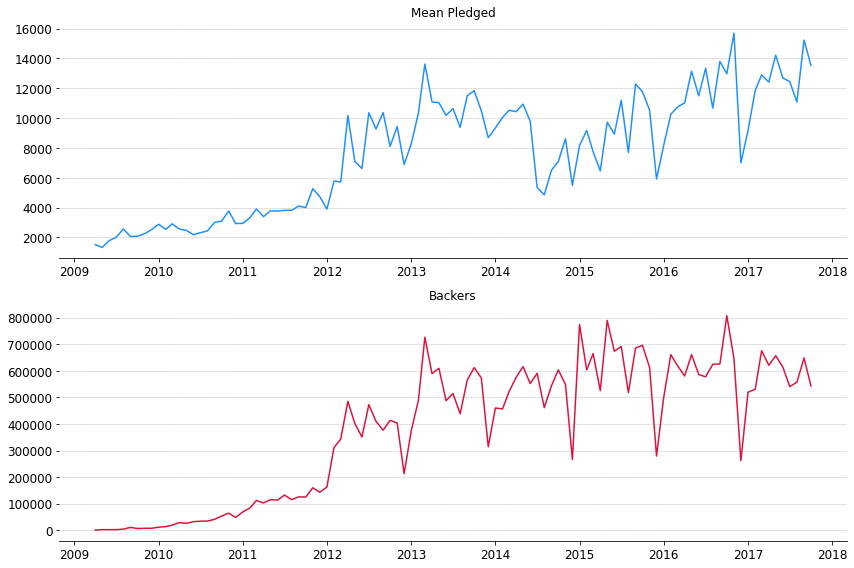

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), facecolor="white")

ax1.plot(dfp_1["year_month"], dfp_1["Mean_Pledged"], color="dodgerblue", label="Mean_Pledged")
ax1.set_title("Mean Pledged")

ax2.plot(dfp_1["year_month"], dfp_1["Backers"], color="crimson", label="Backers")
ax2.set_title("Backers")

ax3.plot(dfp_1)

## Aesthethic
axes = [ax1, ax2]

for ax in axes:
    # Set line visibility
    #ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(linewidth=0.5, axis="y", linestyle="--")

plt.tight_layout()

# Save plot
plt.show()

Notes:
- There is a declining trend in the average money pledged per campaign that starts from 2014.
- Meanwhile, backer's growth also shows a decline phase at the end of the year. Which is similar to the success rate's seasonal decline.
- Maybe further exploration on the difference of the number of backers and the project's pledge can reveal more insight on the incline period. 

In [29]:
## What about their growth with 2009 as index 

## Group by date 
## Group by the continous variable

df_1 = df1.copy()

df_1["count"] = 1

#cont_vars.append["count"]

df_pivot = df_1.groupby("year_month").agg(Backers=("Backers","sum"),
                                   Pledged=("Pledged","sum"),
                                     Project=("count", "sum"),
                                     Goal=("Goal", "sum"),
                                    Mean_Pledged=("Pledged", "mean"),
                                    Mean_Goal=("Goal","mean")).reset_index()
#Change type
df_pivot['year_month'] = df_pivot['year_month'].dt.to_timestamp()

## Set 2009 -04 - 01 index
columns = ["Backers","Pledged","Project","Goal","Mean_Pledged","Mean_Goal"]

for x in columns: 
    #index = df_pivot[df_pivot["year_month"] == "2009-04-01"]
    df_pivot[x + "_Growth"] = (round(df_pivot[x] / df_pivot.at[0,x], 2))*100

df_pivot
## Calculate Index growth rate

,year_month,Backers,Pledged,Project,Goal,Mean_Pledged,Mean_Goal,Backers_Growth,Pledged_Growth,Project_Growth,Goal_Growth,Mean_Pledged_Growth,Mean_Goal_Growth
0,2009-04-01,617,28930,19,107659,1522.631579,5666.263158,100.0,100.0,100.0,100.0,100.0,100.0
1,2009-05-01,2371,98154,74,334703,1326.405405,4523.013514,384.0,339.0,389.0,311.0,87.0,80.0
2,2009-06-01,2192,134142,75,266682,1788.560000,3555.760000,355.0,464.0,395.0,248.0,117.0,63.0
3,2009-07-01,2290,156782,78,786935,2010.025641,10088.910256,371.0,542.0,411.0,731.0,132.0,178.0
4,2009-08-01,4200,295432,115,630262,2568.973913,5480.539130,681.0,1021.0,605.0,585.0,169.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2017-06-01,613932,57122212,4504,165373055,12682.551510,36716.930506,99503.0,197450.0,23705.0,153608.0,833.0,648.0
99,2017-07-01,540536,52492947,4219,147972397,12442.035316,35072.860156,87607.0,181448.0,22205.0,137445.0,817.0,619.0
100,2017-08-01,556973,48247802,4355,396731352,11078.714581,91097.899426,90271.0,166774.0,22921.0,368507.0,728.0,1608.0
101,2017-09-01,648124,62416323,4100,264985346,15223.493415,64630.572195,105044.0,215749.0,21579.0,246134.0,1000.0,1141.0


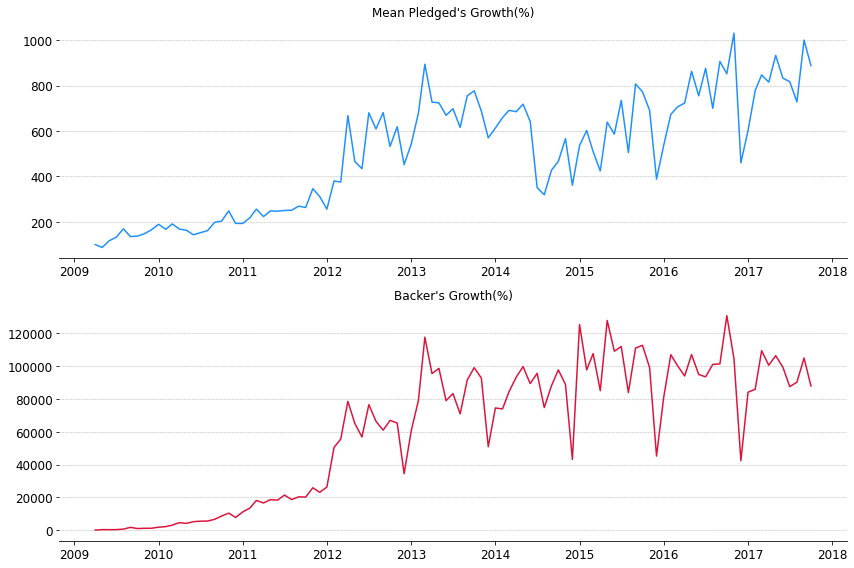

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), facecolor="white")

ax1.plot(df_pivot["year_month"], df_pivot["Mean_Pledged_Growth"], color="dodgerblue", label="Project's Count Growth")
ax1.set_title("Mean Pledged's Growth(%)")

ax2.plot(df_pivot["year_month"], df_pivot["Backers_Growth"], color="crimson", label="Backer's Growth")
ax2.set_title("Backer's Growth(%)")

## Aesthethic
axes = [ax1, ax2]

for ax in axes:
    # Set line visibility
    #ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(linewidth=0.5, axis="y", linestyle="--")

plt.tight_layout()

# Save plot
plt.savefig('kickstarter_7_phase_Backers_growth.png')

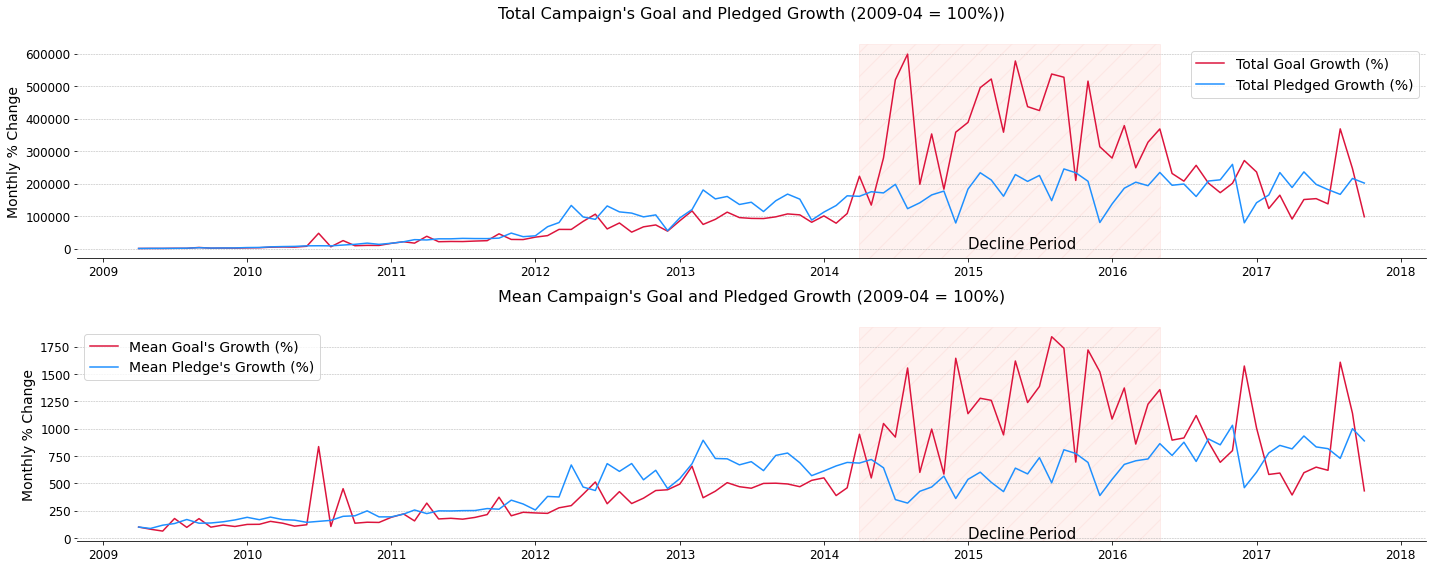

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,8), facecolor="white")

ax1.plot(df_pivot["year_month"], df_pivot["Goal_Growth"], color="crimson", label="Total Goal Growth (%)")
ax1.plot(df_pivot["year_month"], df_pivot["Pledged_Growth"], color="dodgerblue", label="Total Pledged Growth (%)")
ax1.set_title("Total Campaign's Goal and Pledged Growth (2009-04 = 100%))", pad=26)
ax1.set_ylabel("Monthly % Change", fontsize=14)

ax2.plot(df_pivot["year_month"], df_pivot["Mean_Goal_Growth"], color="crimson", label="Mean Goal's Growth (%)")
ax2.plot(df_pivot["year_month"], df_pivot["Mean_Pledged_Growth"], color="dodgerblue", label="Mean Pledge's Growth (%)")
ax2.set_title("Mean Campaign's Goal and Pledged Growth (2009-04 = 100%)", pad=26)
ax2.set_ylabel("Monthly % Change", fontsize=14)

## Aesthethic
axes = [ax1, ax2]

for ax in axes:
    # Set line visibility
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(fontsize="14")
    ax.axvspan(pd.Timestamp("2014-4"), pd.Timestamp("2016-5"), color="salmon", alpha=0.1, hatch="/")
    ax.text(pd.Timestamp("2015-01-01"), 0.55, "Decline Period", fontsize="15")
    ax.title.set_size(16)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(linewidth=0.5, axis="y", linestyle="--")

# Set axis ticks and grid
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

plt.tight_layout()
#plt.show()

plt.savefig('kickstarter_2_line.png')

Conclusion: 
- Project's goal growth exceeds campaign's pledge growth. There is also a noticeable gap between the two variables during the decline period. The gap also doesn't seem to be caused by a decline of campaign pledges, but instead by a rise of campaign's goals. This leads to the conclusion that the decline period correlates to the spiking rise of the campaign's goal that is not kept up by proportional pledge growth. 
- Therefore, the decline period can be caused by the campaign's goal getting more expensive yet backer's pledge spending growth stays relatively the same. 

<h3>Does higher campaign's group goal lower their success rate?</h3>

The correlation between the project's goal and success rate needs to be investigated more. Previous analysis shows that an overall campaign's goal can influence the success rate. But the relation between the campaign's goal and success rate on an individual scale needs further investigation. 

<h4>Correlation Plot</h4>

In [81]:
## Subcategory
df1["Subcategory_1"] = df1["Category"] +"_" + df1["Subcategory"]

C:\Users\Aldo Gadra\AppData\Local\Temp\ipykernel_31412\3735917422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Subcategory_1"] = df1["Category"] +"_" + df_pivot["Subcategory"]


In [35]:
## Add counter and group df by category and subcategory
df_1 = df1.copy()

# Add counter
df_1["count"] = 1

# Group by category and subcategory
df_pivot = pd.pivot_table(df_1, values='count', index=['Category',"Subcategory"], columns='State',
                          aggfunc='count', fill_value = 0).reset_index(drop=False)

## get rid of the first column
df_pivot = df_pivot.rename_axis(None, axis=1)

## Sum the whole count

# Count the sum of project by state
states = df1["State"].unique().tolist()
df_pivot["Count"] = df_pivot[states].sum(axis=1)

# Count Success Percentage
df_pivot["Success_Percentage"] =(round(df_pivot["Successful"]/df_pivot["Count"], 2)*100)
df_pivot = df_pivot.sort_values(by=["Success_Percentage"], ascending=False)

## Combine the Category and Subcategory name for further label
df_pivot["Subcategory_1"] = df_pivot["Category"] +"_" + df_pivot["Subcategory"]

## Inspect 10 df sample
df_pivot.sample(3)

,Category,Subcategory,Canceled,Failed,Live,Successful,Suspended,Count,Success_Percentage,Subcategory_1
95,Games,Video Games,2322,6848,0,2358,52,11580,20.0,Games_Video Games
10,Art,Sculpture,144,956,0,693,3,1796,39.0,Art_Sculpture
54,Fashion,Ready-to-wear,101,588,0,141,6,836,17.0,Fashion_Ready-to-wear


In [36]:
## Calculate Goal statistics based on the subcategory 
data = df1.groupby(["Category","Subcategory"]).agg(median_goal=("Goal","median"),
                                   mean_goal=("Goal","mean"),
                                   goal_sum=("Goal","sum")).reset_index()

data["Subcategory_1"] = data["Category"] +"_" + data["Subcategory"]

data.sample(3)

,Category,Subcategory,median_goal,mean_goal,goal_sum,Subcategory_1
168,Theater,Spaces,12500.0,278854.200957,58280528,Theater_Spaces
107,Music,Electronic Music,2709.0,11085.074613,23622294,Music_Electronic Music
65,Film & Video,Horror,5562.0,148545.721781,186870518,Film & Video_Horror


In [37]:
## Combine with previous pivot data
df_pivot1 = pd.merge(df_pivot, data, on="Subcategory_1", how="outer")

# Sort by the success percentage value
df_pivot1 = df_pivot1.sort_values(by=["Success_Percentage"], ascending=False)

# Inspect 3 sample
df_pivot1.sample(3)

,Category_x,Subcategory_x,Canceled,Failed,Live,Successful,Suspended,Count,Success_Percentage,Subcategory_1,Category_y,Subcategory_y,median_goal,mean_goal,goal_sum
30,Art,Public Art,210,1301,0,1537,10,3058,50.0,Art_Public Art,Art,Public Art,4000.0,81352.465991,248775841
143,Design,Interactive Design,50,258,0,78,1,387,20.0,Design_Interactive Design,Design,Interactive Design,10000.0,39344.583979,15226354
19,Theater,Experimental,26,128,0,209,2,365,57.0,Theater_Experimental,Theater,Experimental,3259.0,42402.128767,15476777


In [38]:
## Transform variable to log form
# To make the data less skewed which help to see the data pattern 
df_pivot1["log_goal_sum"]=np.log(df_pivot1["goal_sum"])
df_pivot1["log_mean_goal"]=np.log(df_pivot1["mean_goal"])

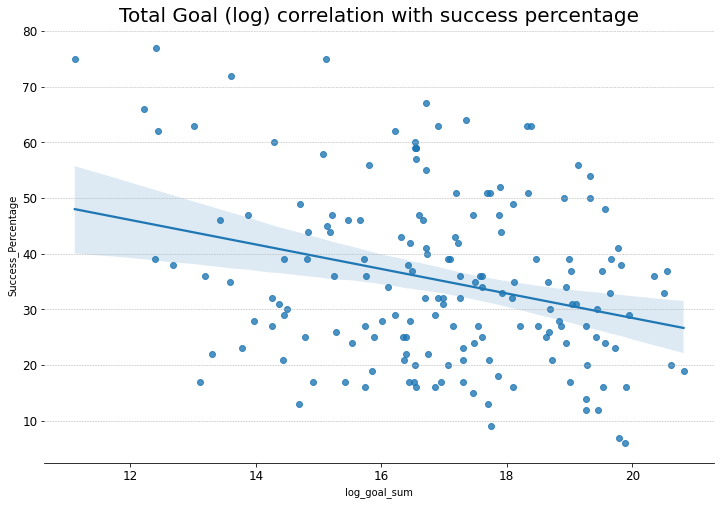

In [111]:
### Backers Check
fig, ax = plt.subplots(figsize=(12,6))

sns.regplot(data=df_pivot1, x="log_goal_sum", y="Success_Percentage", ax=ax)
ax.set_title("Total Goal (log) correlation with success percentage")

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

ax.title.set_size(20)

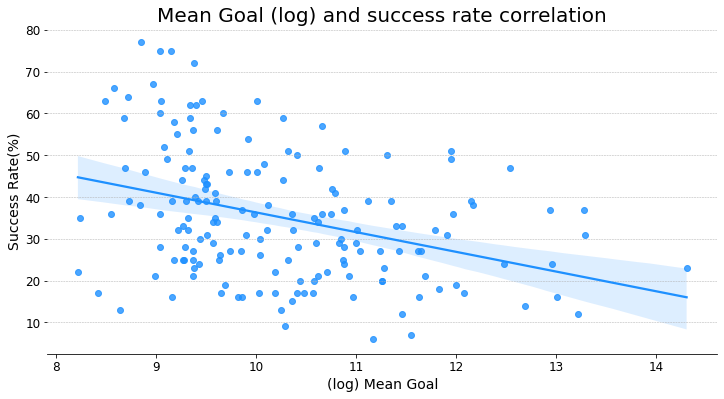

In [46]:
### Backers Check
fig, ax = plt.subplots(figsize=(12,6), facecolor="white")

sns.regplot(data=df_pivot1, x="log_mean_goal", y="Success_Percentage", ax=ax, color="dodgerblue")

ax.set_title("Mean Goal (log) and success rate correlation")
ax.set_ylabel("Success Rate(%)", fontsize=14)
ax.set_xlabel("(log) Mean Goal",fontsize=14)

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

ax.title.set_size(20)
plt.savefig('kickstarter_goal_success_rate.png')

Notes: 
- There is a negative correlation between the goal and success rate (%) variables. So in general, the higher the campaign's goal is, the less of the total money collected is achieved.

### What happened during the decline phase?

Previous analysis shows that the decline period is caused by the unsustainable campaign's goal increase. But why did the campaign's goal increase? As the campaign's goal is mainly dictated by the campaign type, futher exploration will focus more on the campaign's category and its own goal variable. 

#### Category Goal Check

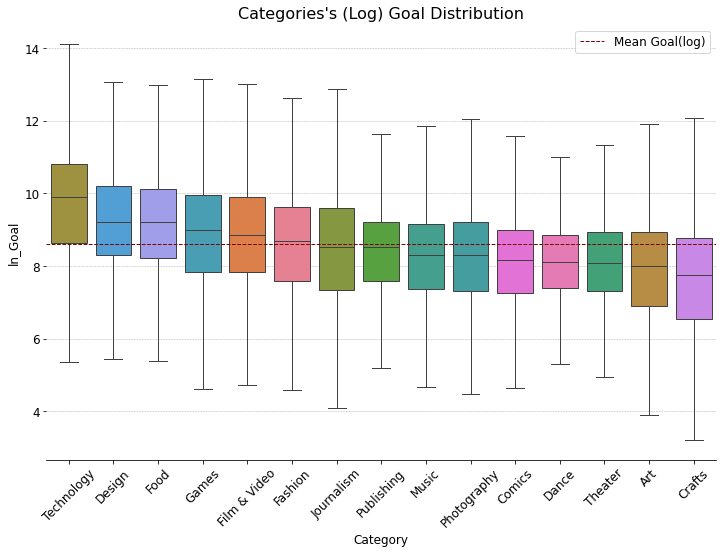

In [38]:
## Goal Box plot

# Transformation 
df1["ln_Goal"] = np.log(df1["Goal"])

# Order descending by goal

order = df1.groupby(by=["Category"]).median().sort_values(by="ln_Goal", ascending=False)

# Boxplot
fig, ax = plt.subplots(figsize=(12,8), facecolor='white')

ax = sns.boxplot(x = "Category", y = "ln_Goal", data=df1, showfliers=False, hue="Category", order=order.index, ax=ax)

## Set line 
ax.axhline(df1.loc[:, 'ln_Goal'].median(), color="maroon",linestyle="dashed", label="Mean Goal(log)", linewidth=1)

## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

plt.title("Categories's (Log) Goal Distribution", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('kickstarter_4_boxplot.png')

Notes: 
- The technology category by far has the highest total campaign goal than any other category, followed by design and food. It is understandable since technology campaigns are mainly tech products that need a great deal of money for their development process. 

#### Goal Deviation Check

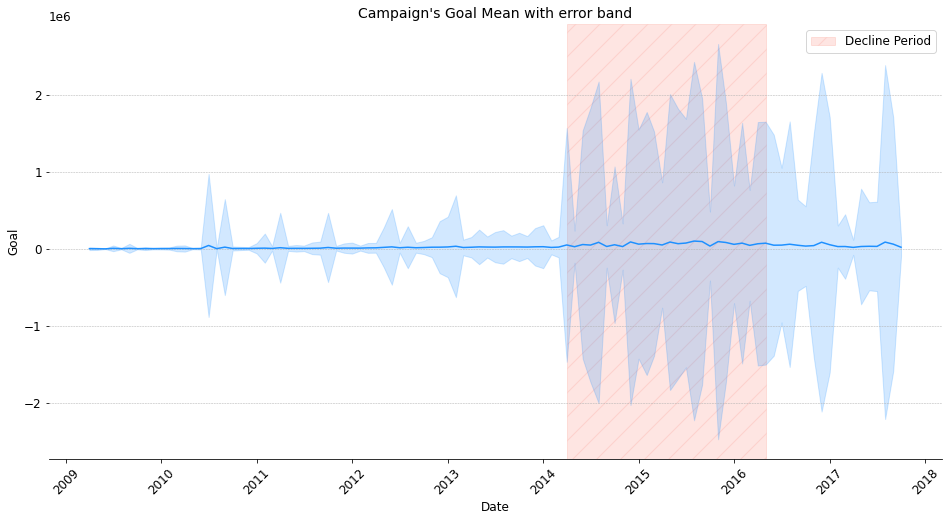

In [ ]:
### Goal Mean Deviation Check 

## Make line chart using seaborn
fig, ax = plt.subplots(figsize=(16,8), facecolor="white")

# Plot decline phase
ax.axvspan(pd.Timestamp("2014-4"), pd.Timestamp("2016-5"), color="salmon", alpha=0.2, hatch="/", label="Decline Period")

# Plot
sns.lineplot(x=df1["year_month"].dt.to_timestamp(), y=df1["Goal"], color="dodgerblue", estimator=np.mean, errorbar='sd', ax=ax)


## Aesthethic
# Set line visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set axis ticks and grid
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(linewidth=0.5, axis="y", linestyle="--")

# Label
ax.set_ylabel('Goal')
ax.set_xlabel('Date')
plt.title("Campaign's Goal Mean with error band", fontsize=14)
plt.legend(fontsize=12)


# Save plot
plt.savefig('kickstarter_5_goal_error_band.png')

Notes:
- Other than the rise of a certain expensive category, maybe the campaign's goal increase could also be caused by the rise of expensive campaigns that have substantial goals. 
- An investigation into the goal variable's deviation showed a rise of deviation in the decline period. This indicates that there is a rise of campaigns with expensive goals during the decline period. 

<h4>Category trend change</h4>

In [48]:
## Group by the 3 phase
def phase_category(date):
    if date < pd.Timestamp("2014-04-01"):
        return "Phase 1"
    elif date >= pd.Timestamp("2014-04-01") and  date < pd.Timestamp("2016-05-01"):
        return "Phase 2"
    else:
        return "Phase 3"

df1["Phase"] = df1["Launched"].apply(phase_category)

Make Category Column

In [49]:
## group adn pivot the dataframe
df_1 = df1.copy()

df_1["count"] = 1

df_pivot = pd.pivot_table(df_1, values='count', index=["Phase","Category",], columns='State',
                          aggfunc='count').reset_index(drop=False)

## get rid of the first column
df_pivot = df_pivot.rename_axis(None, axis=1)

df_pivot.fillna(0, inplace=True)


## Sum the whole count
states = df1["State"].unique().tolist()
df_pivot["Count"] = df_pivot[states].sum(axis=1)


df_pivot.sample(10)

,Phase,Category,Canceled,Failed,Live,Successful,Suspended,Count
11,Phase 1,Photography,330.0,2327.0,0.0,1530.0,7.0,4194.0
12,Phase 1,Publishing,1256.0,9332.0,0.0,5113.0,8.0,15709.0
41,Phase 3,Photography,164.0,930.0,0.0,624.0,11.0,1729.0
33,Phase 3,Dance,36.0,204.0,0.0,329.0,1.0,570.0
13,Phase 1,Technology,428.0,2105.0,0.0,1415.0,24.0,3972.0
14,Phase 1,Theater,260.0,1783.0,0.0,3713.0,3.0,5759.0
39,Phase 3,Journalism,121.0,726.0,0.0,196.0,6.0,1049.0
40,Phase 3,Music,565.0,3617.0,2.0,3477.0,33.0,7694.0
29,Phase 2,Theater,246.0,1374.0,0.0,1934.0,18.0,3572.0
44,Phase 3,Theater,96.0,525.0,0.0,856.0,0.0,1477.0


In [50]:
dfp = df_pivot.copy()

## Count percentage point
dfp["Percentage"] = (round(dfp["Count"]/dfp["Count"].sum(),3)*100)

## Sort by percentage point
dfp = dfp.sort_values(by=["Percentage"], ascending=False)

## Filter to 3 category
dfp = dfp[["Category","Phase","Percentage"]]

## Seperate to 3 df
Phase_1 = dfp[dfp["Phase"]=="Phase 1"]
Phase_2 = dfp[dfp["Phase"]=="Phase 2"]
Phase_3 = dfp[dfp["Phase"]=="Phase 3"]

## Sort Descending
Phase_1 = Phase_1.sort_values(by=["Percentage"], ascending=False)
Phase_2 = Phase_2.sort_values(by=["Percentage"], ascending=False)
Phase_3 = Phase_3.sort_values(by=["Percentage"], ascending=False)

p1 = Phase_1.head(3)
p2 = Phase_2.head(3)
p3 = Phase_3.head(3)

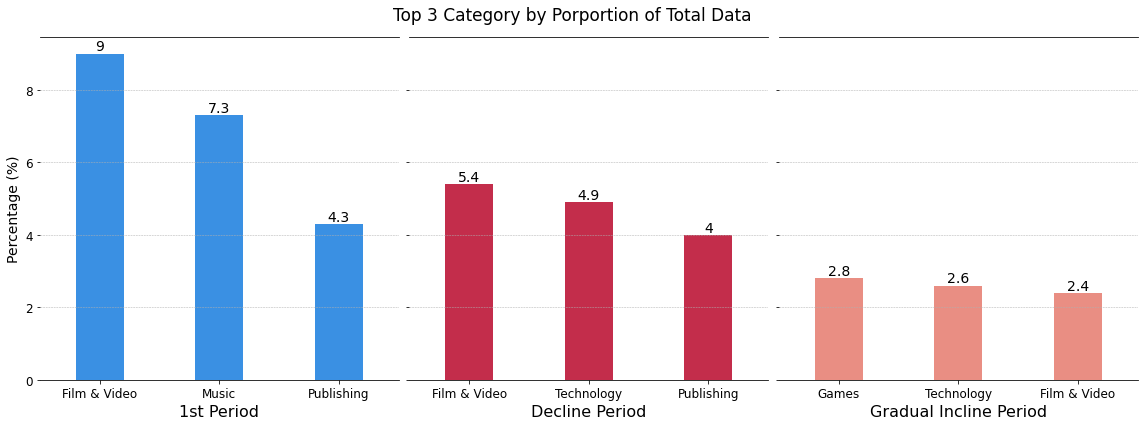

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6), sharey=True, facecolor="white")
fig.suptitle("Top 3 Category by Porportion of Total Data", fontsize=17)

sns.barplot(p1, x="Category", y="Percentage", ax=ax1, width=0.4, color="dodgerblue")
ax1.bar_label(ax1.containers[0], fontsize=14)
ax1.set_ylabel('Percentage (%)', fontsize=14)
ax1.set_xlabel('1st Period', fontsize=16)

sns.barplot(p2, x="Category", y="Percentage", ax=ax2, width=0.4, color="crimson")
ax2.bar_label(ax2.containers[0], fontsize=14)
ax2.set_xlabel('Decline Period', fontsize=16)


sns.barplot(p3, x="Category", y="Percentage", ax=ax3, width=0.4, color="salmon")
ax3.bar_label(ax3.containers[0], fontsize=14)
ax3.set_xlabel('Gradual Incline Period', fontsize=16)

## Aesthethic
axes = [ax1, ax2, ax3]

for ax in axes:
    # Set line visibility
    #ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.legend(fontsize="14")
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    ax.grid(linewidth=0.5, axis="y", linestyle="--")

plt.tight_layout()

# Save plot
plt.savefig('kickstarter_6_phase_composition.png')

Conclusion: 
- Other than the total campaign goal, what else is changing during the decline period? If we split the data distribution based on the incline and decline periods, then we can see that there is a category composition change at each period. During the decline period, it is noticeable that the technology campaign took a rise. 
- Technology has been known to be the most expensive campaign, and its rise could be associated with the rise of 'expensive' campaigns and hence caused the decline period.  

### Overall Conclusion

- Kickstarter's overall success rate declines from 2014 to 2016. This decline period is associated with the sudden rise of total campaign goal that is not met by a proportional rise of the campaign's pledge. As the project have higher goal demand without substantial backing, campaigns started to fail achieving their campaign's donation goal. 
- Campaign's goal started to deviate during the decline period, which indicates a rise of campaigns with goals that are relatively high. Further investigation also found that technology is to be more likely having high campaign goals. A look into the category composition of every period shows that there is a rise of technology campaigns during the decline period and onwards. 
- So it can be concluded that Kickstarter campaign's success rate decline is caused by a rise in campaigns that are too expensive for backers to support. These expensive campaigns rise may be associated with the rise of technology campaign popularity in Kickstarter.   

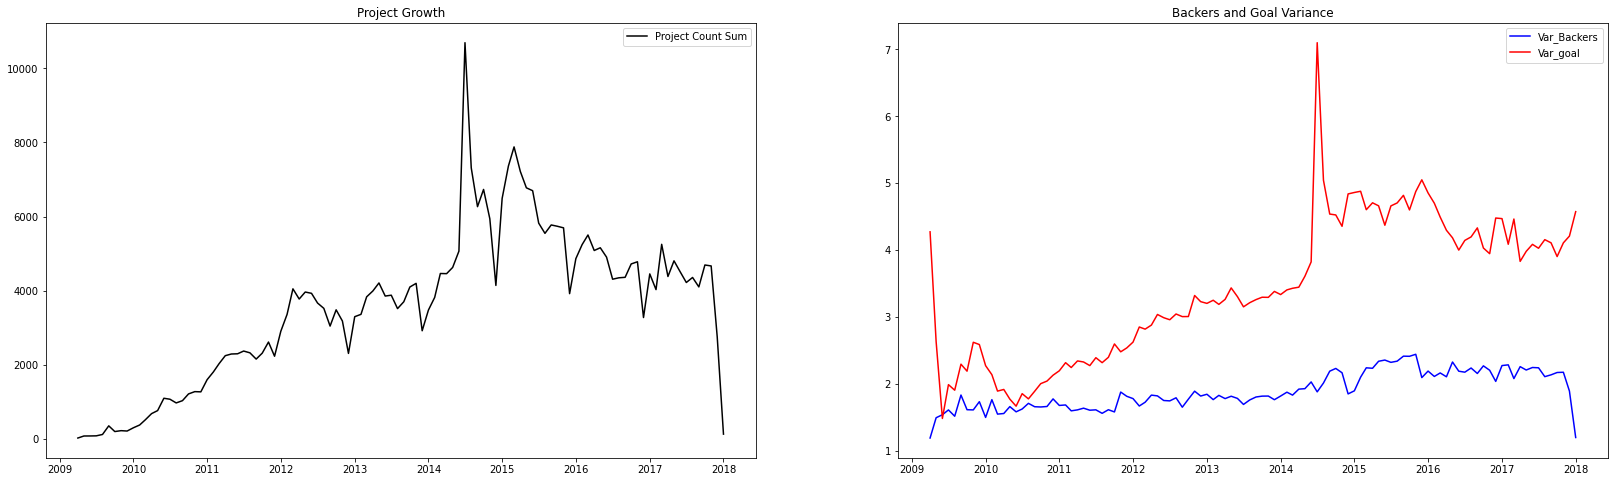

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28,8))

ax1 = axes[0]
ax2 = axes[1]

ax1.plot(df_pivot["year_month"], df_pivot["Sum_project"], color="black", label="Project Count Sum")
ax1.set_title("Project Growth")


ax2.plot(df_pivot["year_month"], df_pivot["Var_Backers"], color="blue", label="Var_Backers")
ax2.plot(df_pivot["year_month"], df_pivot["Var_goal"], color="red", label="Var_goal")
ax2.set_title("Backers and Goal Variance")


ax1.legend()
ax2.legend()
